## Фейман Кац vs Уравнение Колмогорова

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [59]:
def Bachilier(x, t, sigma, T = 1.0):
    theta = sigma * np.sqrt(T - t) + 1e-10
    d = x / theta
    return theta * (d * sps.norm.cdf(d) + sps.norm.pdf(d))

def density(x, t, sigma):
    theta = sigma * np.sqrt(t) + 1e-10
    return sps.norm.pdf(x, loc=0, scale=theta)

In [63]:
ts = [0.01, 0.25, 0.5, 1.0]
xs = np.linspace(-1.5, 1.5, 10000)
xs2 = np.linspace(-1.5, 1.5, 10000)
sigma = 1

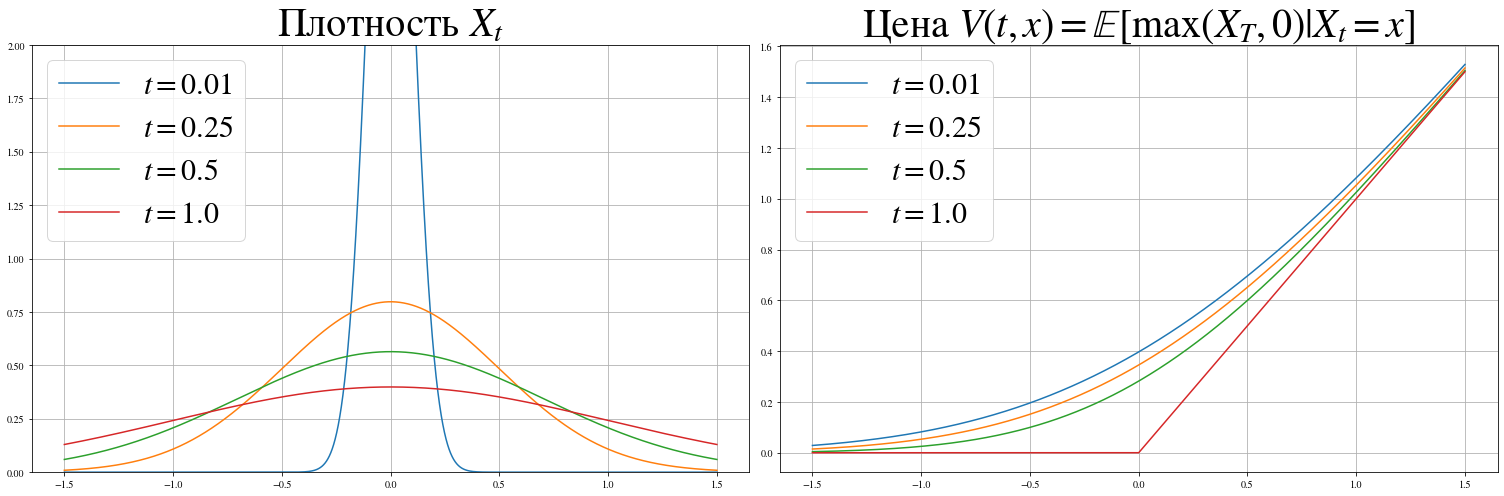

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
for t in ts:
    dens = density(xs, t, sigma) 
    ax[0].plot(xs, dens, label=rf"$t={t}$")
    ax[1].plot(xs2, Bachilier(xs2, t, sigma), label=rf"$t={t}$")
ax[0].set_ylim(0, 2)
for i in range(2):
    ax[i].grid()
    ax[i].legend(fontsize=30, loc=2)
ax[0].set_title(r"Плотность $X_t$", fontsize=40)
ax[1].set_title(r"Цена $V(t, x) = \mathbb{E} \left[ \max(X_T, 0) | X_t = x \right]$", fontsize=40)
fig.tight_layout()
plt.show()
fig.savefig("../3_figs/динамика плотности и цены.png")

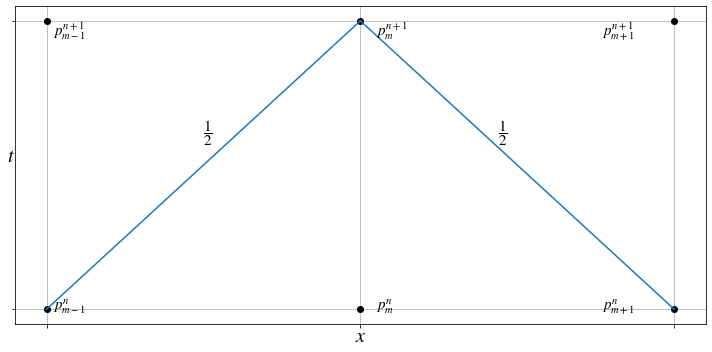

In [158]:
current = ([-1, 0, 1], [0, 0, 0])
nxt = ([-1, 0, 1], [1, 1, 1])
fig = plt.figure(figsize=(10, 5))
plt.plot(*current, 'ob', color='black')
plt.plot(*nxt, 'o', color='black')
plt.plot([-1, 0], [0, 1], c='C0')
plt.plot([1, 0], [0, 1], c='C0')

fs = 15
plt.text(*[-1 + 0.02, 0], r'$p_{m-1}^n$', fontsize=fs)
plt.text(*[0  + 0.05, 0], r'$p_{m}^n$', fontsize=fs)
plt.text(*[1  - 0.23, 0], r'$p_{m+1}^n$', fontsize=fs)

plt.text(*[-1 + 0.02, 1-0.05], r'$p_{m-1}^{n+1}$', fontsize=fs)
plt.text(*[0  + 0.05, 1-0.05], r'$p_{m}^{n+1}$', fontsize=fs)
plt.text(*[1  - 0.23, 1-0.05], r'$p_{m+1}^{n+1}$', fontsize=fs)

plt.text(*[-0.5, 0.5 + 0.1], r'$\dfrac{1}{2}$', fontsize=fs)
plt.text(*[0.5 - 0.06, 0.5 + 0.1], r'$\dfrac{1}{2}$', fontsize=fs)

#plt.axis('off')
plt.xticks([-1, 0, 1])
plt.yticks([ 0, 1])
plt.grid(True, color='grey', linestyle='-', linewidth=0.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.xlabel(r"$x$", fontsize=fs + 5)
plt.ylabel(r"$t$", rotation=0, fontsize=fs + 5)
fig.tight_layout()
plt.show()
fig.savefig("../3_figs/разностная схема.png")